In [3]:
import pandas as pd
import os
from PIL import Image
import numpy as np
from torch import  nn
from model_cbam import ResNet
from model_cbam import BasicBlock
from model_cbam import Bottleneck
from model_cbam import _netG_CIFAR10
import torch.optim as optim
from tqdm import tqdm
import pickle
model = mod5=ResNet(BasicBlock)
modelG=_netG_CIFAR10(110)

In [4]:
import torch

# Step 1: 检查GPU可用性
if torch.cuda.is_available():
    device = torch.device('cuda')  # 设置设备为GPU
    print("GPU可用")
else:
    device = torch.device('cpu')   # 设置设备为CPU
    print("GPU不可用，将使用CPU")




GPU可用


In [5]:
from torchvision import transforms

# 定义你的transforms
transform = transforms.Compose([
    #transforms.Resize(256),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

c:\Users\35807\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, csv,address,dic,transform=None):

        self.csv=csv
        self.address=address
        self.transform = transform
        self.dic=dic
    
    def __len__(self):
        """
        返回数据集中样本的数量。
        """
        return len(self.csv)
    
    def __getitem__(self, idx):
        """
        根据给定的索引idx返回一个样本。
        参数:
            idx (int): 样本的索引。
        返回值:
            一个包含特征和标签的元组。
        """
        all=self.csv.iloc[idx]
        x=all[0]
        x=str(x)+".png"
        new_add=os.path.join(self.address,x)
        image=Image.open(new_add)
        #image_array=np.array(image)
        if self.transform:
            x = self.transform(image)
        #x=image_array
        y=all[1]
        #y=y[1]
        #y=str(y)
        y=self.dic[y]
        return x,y

In [7]:
address="C:\\Users\\35807\\Desktop\\paper\\cifar-10\\train"
frog=torch.tensor([1,0,0,0,0,0,0,0,0,0])
truck=torch.tensor([0,1,0,0,0,0,0,0,0,0])
deer=torch.tensor([0,0,1,0,0,0,0,0,0,0])
automobile=torch.tensor([0,0,0,1,0,0,0,0,0,0])
bird=torch.tensor([0,0,0,0,1,0,0,0,0,0])
horse=torch.tensor([0,0,0,0,0,1,0,0,0,0])
cat=torch.tensor([0,0,0,0,0,0,1,0,0,0])
ship=torch.tensor([0,0,0,0,0,0,0,1,0,0])
airplane=torch.tensor([0,0,0,0,0,0,0,0,1,0])
dog=torch.tensor([0,0,0,0,0,0,0,0,0,1])
dic={}
dic['frog']=frog
dic['truck']=truck
dic["deer"]=deer
dic["automobile"]=automobile
dic["bird"]=bird
dic["horse"]=horse
dic["cat"]=cat
dic['ship']=ship
dic["airplane"]=airplane
dic["dog"]=dog

In [8]:
csv=pd.read_csv(f"C:\\Users\\35807\\Desktop\\paper\\cifar-10\\trainLabels.csv")
# csv
# x=csv.iloc[0][0]
# x=str(x)+'.png'
# new_add=os.path.join(address,x)
# new_add
# image = Image.open(new_add)

# image_array = np.array(image)
# image_array

In [9]:
# netD= ResNet(Bottleneck, [2, 2, 2, 2])
# netG=_netG_CIFAR10(110)
batch_size=3
nz=100

In [10]:
custom_dataset = CustomDataset(csv=csv,address=address,dic=dic,transform=transform)

# 使用DataLoader来加载数据集
data_loader = DataLoader(dataset=custom_dataset, batch_size=batch_size, shuffle=True,drop_last=True)

# 使用DataLoader
# for x,y in data_loader:
#     # 在这里处理批量数据和标签
#     # 例如：训练模型
#     #print(type(y))
#     # print(y)
#     #print(y.shape)
#     pass

In [11]:
netD=ResNet(BasicBlock)
netG=_netG_CIFAR10(110)
batch_size=3
nz=110

In [12]:
input = torch.FloatTensor(batch_size, 3, 32,32)
noise = torch.FloatTensor(batch_size, nz, 1, 1)
eval_noise = torch.FloatTensor(batch_size, nz, 1, 1).normal_(0, 1)
dis_label = torch.tensor([0])
aux_label = torch.LongTensor(batch_size)
real_label = 1
fake_label = 0
real_label = 1
fake_label = 0
num_classes=10
dis_criterion = nn.BCELoss()
aux_criterion = nn.NLLLoss()
real_label = torch.full((batch_size, 1), 1)
#wrong_label=torch.full((batch_size, 1), 0)
wrong_label=torch.tensor([0]).squeeze().float()
criterion = nn.CrossEntropyLoss()

In [13]:
# print(dis_output.shape)
# #print(wrong_label.shape)
# print(dis_output.squeeze().shape)
# print(wrong_label.shape)
# print(wrong_label.squeeze().shape)
# print(dis_output.shape)
# print(dis_output.squeeze().shape)
#print(aux_output.shape)

In [14]:
optimizerD = optim.Adam(netD.parameters(), lr=0.05, )
optimizerG = optim.Adam(netG.parameters(), lr=0.05, )
netD=netD.to(device)
netG=netG.to(device)
avg_loss_D = 0.0
avg_loss_G = 0.0
avg_loss_A = 0.0
aux_errD_reals=[]
dis_errD_fakes=[]
aux_errD_fakes=[]
#for epoch in tqdm(range(10)):
for epoch in range(10):
    idx=0
    dis_errD_fakess=0
    aux_errD_fakess=0
    aux_errD_realss=0
    for  x,y in tqdm(data_loader,leave=False):
        x=x.to(device)
        y=y.to(device)
        idx=idx+1
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_cpu, label = x,y#获取到xy
        batch_size = real_cpu.size(0)
        # if device=="cuda":
        #     real_cpu = real_cpu.cuda()
        #input.data.resize_as_(real_cpu).copy_(real_cpu)
        # dis_label.data.resize_(batch_size).fill_(real_label)
        # aux_label.data.resize_(batch_size).copy_(label)
        dis_output, aux_output = netD(real_cpu)#先输出的是概率，后输出的是类别，dis是概率，aux是类别

        wrong_label=wrong_label.to(device)
        dis_errD_real = dis_criterion(dis_output, wrong_label)#计算概率损失,最佳期望：全部为0
        # print(aux_output)
        # print(aux_output.shape)
        # print(label)
        # print(label.shape)
        label=label.float()
        aux_errD_real = criterion(aux_output, label)#计算类别损失
        aux_errD_realss=aux_errD_realss+aux_errD_real
        errD_real = dis_errD_real + aux_errD_real#损失分为两部分，一部分是概率的损失，一部分是类别的损失
        errD_real.backward()
        #D_x = dis_output.data.mean()


        # train with fake，用生成是数据测试
        noise.data.resize_(batch_size, nz, 1, 1).normal_(0, 1)#生成噪音，用于生成图片
        label = np.random.randint(0, num_classes, batch_size)#噪音对应的标签
        noise_ = np.random.normal(0, 1, (batch_size, nz))
        class_onehot = np.zeros((batch_size, num_classes))
        class_onehot[np.arange(batch_size), label] = 1
        noise_[np.arange(batch_size), :num_classes] = class_onehot[np.arange(batch_size)]
        noise_ = (torch.from_numpy(noise_))
        noise.data.copy_(noise_.view(batch_size, nz, 1, 1))
        aux_label.data.resize_(batch_size).copy_(torch.from_numpy(label)).to(device)
        
        noise=noise.to(device)
        fake = netG(noise)
        dis_label.data.fill_(fake_label).to(device)
        dis_label=dis_label.squeeze().float().to(device)
        dis_output, aux_output = netD(fake.detach())
        # print(dis_output.shape)
        # print(dis_label.shape)
        
        
        # print(dis_output)
        # print(dis_label) 
        dis_errD_fake = dis_criterion(dis_output, dis_label)#计算概率损失
        #print(aux_output)
        #print(aux_label)
        aux_label=aux_label.to(device)
        aux_errD_fake = aux_criterion(aux_output, aux_label)#计算类别损失
        dis_errD_fakess=dis_errD_fakess+dis_errD_fake
        aux_errD_fakess=aux_errD_fakess+aux_errD_fake
        
        
        errD_fake = dis_errD_fake + aux_errD_fake
        errD_fake.backward()
        D_G_z1 = dis_output.data.mean()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        #dis_label.data.fill_(real_label)  # fake labels are real for generator cost
        dis_label.data.fill_(1) 
        dis_output, aux_output = netD(fake)
        dis_errG = dis_criterion(dis_output, dis_label)
        aux_errG = aux_criterion(aux_output, aux_label)
        errG = dis_errG + aux_errG
        errG.backward()
        D_G_z2 = dis_output.data.mean()
        optimizerG.step()
    dis_errD_fakess=dis_errD_fakess/idx
    aux_errD_fakess=aux_errD_fakess/idx
    aux_errD_realss=aux_errD_realss/idx
    dis_errD_fakes.append(dis_errD_fakess)
    aux_errD_reals.append(aux_errD_realss)
    aux_errD_fakes.append(aux_errD_fakes)

# with open('dis_errD.pkl', 'rb') as f:
#     pickle.dump(dis_errD_fakes, f)
# with open('aux_errD_real.pkl', 'rb') as f:
#     pickle.dump(aux_errD_reals, f)
# with open('aux_errD_fake.pkl', 'rb') as f:
#     pickle.dump(aux_errD_fakes, f)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

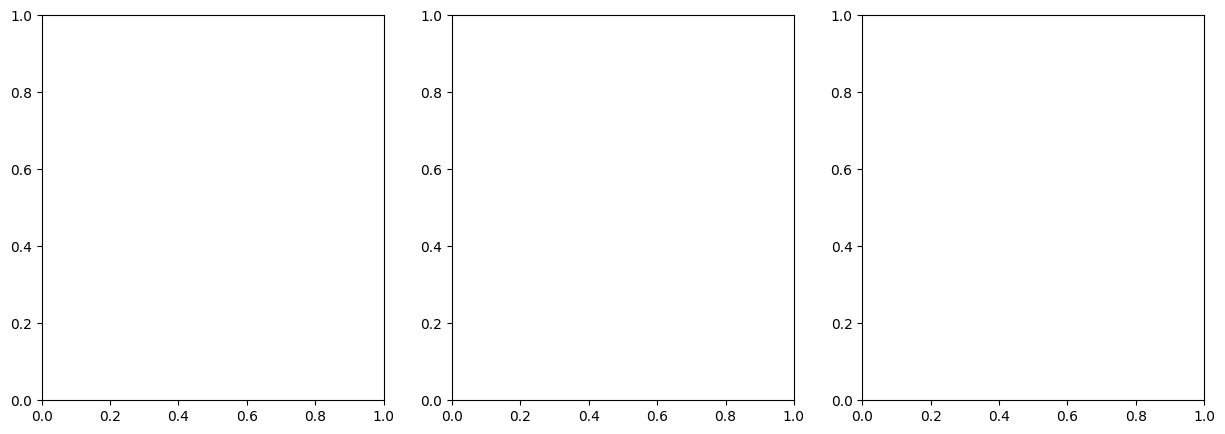

In [15]:
import matplotlib.pyplot as plt

# 创建一个行三列的子图布局
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # figsize可以根据需要调整

# 在第一个子图上绘制dis_errD_fakes
axs[0].plot(dis_errD_fakes)
axs[0].set_title('dis_errD_fakes') # 可以设置标题
axs[0].set_xlabel('Epoch') # 设置X轴标签
axs[0].set_ylabel('Error') # 设置Y轴标签

# 在第二个子图上绘制aux_errD_reals
axs[1].plot(aux_errD_reals)
axs[1].set_title('aux_errD_reals')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Error')

# 在第三个子图上绘制aux_errD_fakes
axs[2].plot(aux_errD_fakes)
axs[2].set_title('aux_errD_fakes')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Error')

plt.tight_layout() # 自动调整子图间距
plt.show() # 显示图表


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是您的数据张量，这里我们只是示例，您应当使用您自己的数据
# 假设 dis_errD_fakes, aux_errD_reals, aux_errD_fakes 已经是CUDA上的张量

# 将张量从CUDA转移到CPU，并转换为NumPy数组
dis_errD_fakes_np = dis_errD_fakes.cpu().numpy()
aux_errD_reals_np = aux_errD_reals.cpu().numpy()
aux_errD_fakes_np = aux_errD_fakes.cpu().numpy()

# 创建一个行三列的子图布局
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # figsize可以根据需要调整

# 在第一个子图上绘制dis_errD_fakes
axs[0].plot(dis_errD_fakes_np)
axs[0].set_title('dis_errD_fakes') # 可以设置标题
axs[0].set_xlabel('Epoch') # 设置X轴标签
axs[0].set_ylabel('Error') # 设置Y轴标签

# 在第二个子图上绘制aux_errD_reals
axs[1].plot(aux_errD_reals_np)
axs[1].set_title('aux_errD_reals')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Error')

# 在第三个子图上绘制aux_errD_fakes
axs[2].plot(aux_errD_fakes_np)
axs[2].set_title('aux_errD_fakes')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Error')

plt.tight_layout() # 自动调整子图间距
plt.show() # 显示图表


AttributeError: 'list' object has no attribute 'cpu'

In [31]:
for i in range(10):
    print(aux_errD_fakes)

[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
